# Set up atmospheric forcing from CESM2 experiment output

Variables available etc.: https://docs.google.com/spreadsheets/u/1/d/1OPcJsTcpaxBVZqcRpEEf16cipuL3CUk2nWojQ_ulRjE/edit?gid=0#gid=0

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import cmocean
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.utils import fix_lon_range
from nemo_python_git.interpolation import extend_into_mask

In [72]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [24]:
def era5_process(filename, land_mask=False):
    
    ds = xr.open_dataset(filename).rename({'valid_time':'time'}).isel(time=0)

    if land_mask:
        lm = xr.open_dataset(f'{base_folder}ERA5-forcing/ERA5-landmask.nc').isel(time=0)
        lm['longitude'] = fix_lon_range(lm['longitude'])
        ds[var] = xr.where((lm.lsm!=0), np.nan, ds[var])
    # ds = ds.convert_calendar('gregorian')

    return ds

In [73]:
lm = xr.open_dataset(f'{base_folder}ERA5-forcing/ERA5-landmask.nc').isel(time=0)
lm['longitude'] = fix_lon_range(lm['longitude'])
lm = lm.sortby('longitude')

In [74]:
ds = xr.open_dataset(f'{base_folder}ERA5-forcing/daily/files/{var}_y1979.nc')

In [75]:
new_var = xr.where((lm.lsm!=0), np.nan, ds.isel(valid_time=0)[var])

In [ ]:
var='d2m'
ds = era5_process(f'{base_folder}ERA5-forcing/daily/files/{var}_y1979.nc', land_mask=True)

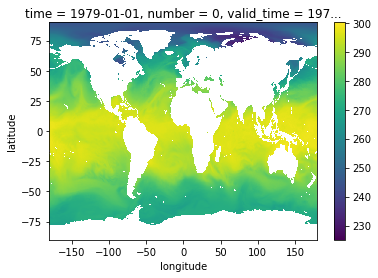

In [77]:
new_var.isel(valid_time=0).plot()

In [78]:
src_to_fill = xr.where(np.isnan(new_var), -9999, new_var)

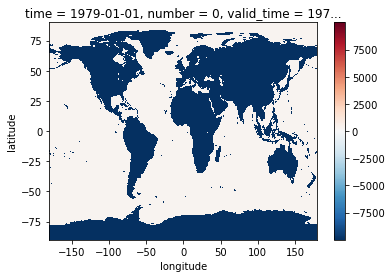

In [54]:
src_to_fill.plot()

In [ ]:
src_to_fill = xr.where(np.isnan(new_var), -9999, new_var)
var_filled  = extend_into_mask(src_to_fill.values, missing_val=-9999, fill_val=np.nan, use_2d=True, use_3d=False, num_iters=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [61]:
ds[var] = (('latitude','longitude'), var_filled)

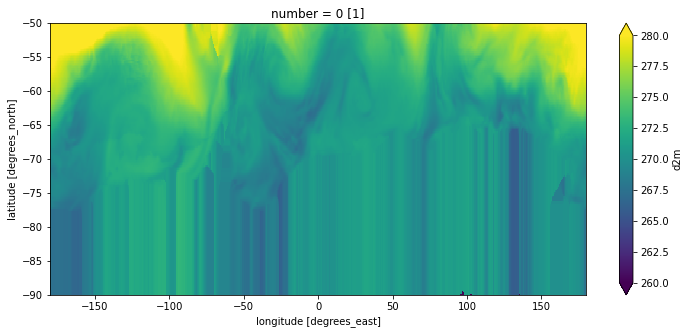

In [69]:
ds.d2m.plot(figsize=(12,5), vmin=260, vmax=280, ylim=(-90,-50))

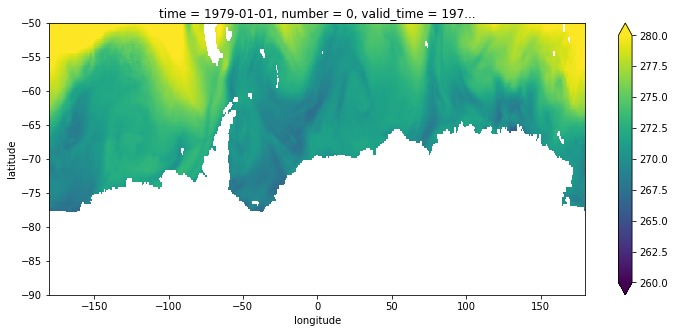

In [71]:
new_var.plot(figsize=(12,5), vmin=260, vmax=280, ylim=(-90,-50))